### 워드클라우드 함수 

In [1]:
import pandas as pd
import numpy as np
import os, glob
from tqdm import tqdm

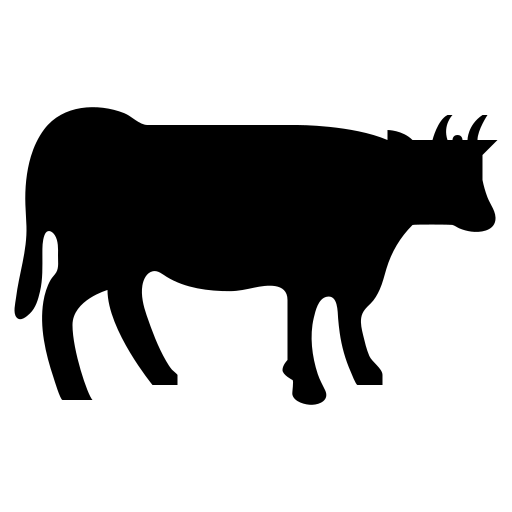

In [6]:

from PIL import Image
import numpy as np

img = Image.open('./cow_pic.png')

# 이미지를 'RGB' 모드로 변환
img = img.convert('RGB')

# JPEG 형식으로 저장
img.save('./apple.png', 'JPEG')
img

In [7]:
# 이미지를 수치화
img=np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [83]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np


okt=Okt()
kkma=Kkma()

def make_wordcloud(df,title,img_path):
    df.drop_duplicates(inplace=True)

    total=[]
    
    for i in (tqdm(df['리뷰내용'])):
        try:
        # 이모지 빼기
            t = okt.normalize(i)
            t = " ".join(re.findall("[a-zA-Z가-힣0-9 ]+", t))  #정규표현식( \w )랑 같음
            t = kkma.pos(t)

            for j in t:
                if j[1] in ['NNG', 'NNP']:  # 명사
                    total.append(j[0])
        except:
            continue

    text=[i for i in total if len(i)>=2]

    from collections import Counter
    result=Counter(text)

    # 워드클라우드 이미지
    img = Image.open('./cow_pic.png')

    # 이미지를 'RGB' 모드로 변환
    img = img.convert('RGB')

    # JPEG 형식으로 저장
    img.save('./apple.png', 'JPEG')
    img

    font_path = "BMDOHYEON_ttf.ttf"

    wordcloud = WordCloud(
        font_path=font_path,  # 한글 폰트 경로 지정
        width=800,
        height=400,
        background_color='white',  # 배경색을 흰색으로 설정
        colormap='plasma',  # 색상 맵 지정
        max_words=50,  # 표시할 최대 단어 수
    )


    # 판매량 높은 명사 빈도를 이용하여 워드클라우드 생성
    # 한글 폰트를 지정한 후, wordcloud에 빈도 정보를 전달합니다
    wordcloud.generate_from_frequencies(frequencies=result)
    wordcloud.to_file(f"{title}_colud.png")

    # 워드클라우드를 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



In [84]:
fruit=pd.read_csv('./data/fruit.csv')
del fruit['Unnamed: 0']
fruit.head(3)

,리뷰내용,리뷰점수
0,가게에서 딸기 청 담글때 사용합니다!생딸기 시즌아니어도 딸기청 담글 수 있꼬 칠레산...,5
1,너무 맛있어요. 두번째 구매 했는데 아이들이 잘먹내요,5
2,쥬스용이라 괜잖은데 저번보다 크기가 많이 나네요,4


  0%|          | 0/19394 [00:00<?, ?it/s]

100%|██████████| 19394/19394 [06:27<00:00, 50.09it/s] 


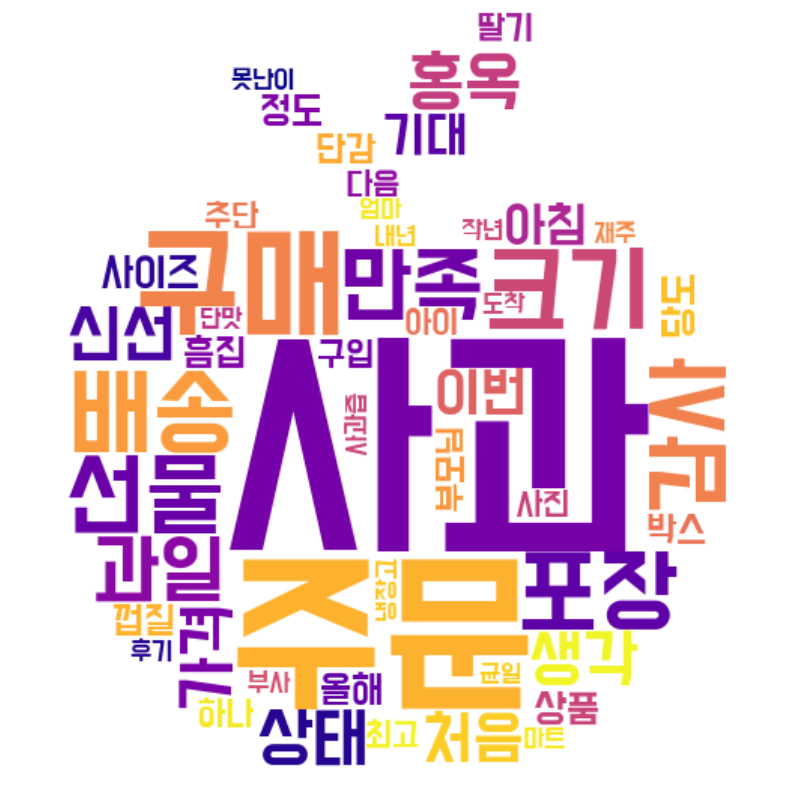

In [85]:
make_wordcloud(fruit,'fruit1','./cow_pic.png')